# CP5 - Aprendizado de Máquina Supervisionado

### Instruções:

1) Neste Jupyter Notebook há 2 questões de Aprendizado de Máquina Supervisionado para as tarefas de Regressão e Classificação. Cada questão possui uma pontuação indicada em vermelho, somando 10 pontos ao final;

2) O CP é em grupo de até **5 pessoas**;

3) Preencham o nome de cada membro do grupo corretamente;

4) Coloque seu código solução logo abaixo de cada questão que ele responde;

5) Use células markdown para escrever respostas que forem pedidas ou que você achar pertinentes;

6) Você pode e **deve** usar bibliotecas prontas. Ao importar uma biblioteca, comente na frente para o que ela serve;

7) Apenas um aluno submeterá no Teams. Mude o nome do arquivo para **CP5-turma-NomeSobrenome.ipynb** onde **turma** deve ser trocado pela turma do grupo (H,A,F,G) e o NomeSobrenome trocado pelo nome e sobrenome do aluno que submeter o arquivo;

8) A atividade tem previsão de **1h50 de duração**.


### Atenção:
Vocês podem usar trechos de códigos prontos, entretanto é pouco provável que dois grupos tenham códigos **totalmente iguais**, nas mesmas sequências com as mesmas respostas. Caso for constatada semelhança exagerada entre dois arquivos que indique **plágio**, a nota  <font color='red'> será zerada!</font>

------------------------------

## 1) Drone <font color='red'>(5 pontos)</font>

No arquivo drone_data.csv, você recebeu dados consolidados de vários voos realizados pelo mesmo drone de entrega.

- **flight:** número do voo;
- **speed:** velocidade média durante o voo (m/s)
- **payload:** peso da carga transportada (g)
- **altitude:** altitude de cruzeiro predefinida (m)
- **date:** data do voo
- **local_time:** horário em que o voo ocorreu 
- **route** sigla da rota que o drone voou
- **total_energy:** energia total consumida da bateria (J)
- **mean_wind_speed:** velocidade média do vento (m/s)
- **flight_duration:** tempo total de duração do voo (s)

Estes são dados de um drone quadcoptero real utilizado para entrega de pacotes. O dataset foi disponibilizado online no KiltHub em 2020. Seguem os autores e link para o repositório original:

Rodrigues, Thiago A.; Patrikar, Jay; Choudhry, Arnav; Feldgoise, Jacob; Arcot, Vaibhav; Gahlaut, Aradhana; et al. (2020): Data Collected with Package Delivery Quadcopter Drone. Carnegie Mellon University. Dataset. https://doi.org/10.1184/R1/12683453.v3


(a) Crie um modelo de Aprendizado de Máquina para prever a rota (**route**) que o drone tomou baseado nos atributos de voo. Você deve obter uma Acurácia de pelo menos 90%.  <font color='red'>(2.5 pontos)</font>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
dados = pd.read_csv('drone_data.csv', sep=',') 

In [11]:
dadosD = dados.drop(columns = ['local_time', 'date'])

In [5]:
dados.head()

,flight,speed,payload,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration
0,1,4.0,0.0,25,2019-04-07,10:13,non R1,78473,3.90,200.7
1,2,4.0,0.0,50,2019-04-07,10:23,non R1,91363,3.52,271.2
2,3,6.0,0.0,25,2019-04-07,10:33,non R1,61487,4.58,180.1
3,4,8.0,0.0,25,2019-04-07,10:48,non R1,52915,4.60,171.0
4,5,4.0,0.0,25,2019-04-07,11:05,non R1,68589,3.33,217.0


In [12]:
x = dadosD.drop(columns = 'route')
y = dadosD['route']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head(5)

In [14]:
y_train.head(5)

86         R1
202    non R1
67         R1
82         R1
204        R1
Name: route, dtype: object

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

LinearDiscriminantAnalysis()

In [17]:
y_predicoes = lda.predict(x_test) 

In [18]:
y_test

161        R1
15         R1
73         R1
96         R1
166        R1
9          R1
100        R1
135        R1
18         R1
148    non R1
171        R1
30         R1
155    non R1
205        R1
125        R1
196        R1
164        R1
189        R1
84         R1
75         R1
124        R1
170        R1
104        R1
101        R1
69         R1
25         R1
95         R1
16         R1
141        R1
184        R1
154    non R1
68         R1
66         R1
120        R1
147        R1
98         R1
138        R1
167        R1
45         R1
113        R1
65         R1
177        R1
Name: route, dtype: object

In [19]:
y_predicoes

array(['R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'non R1',
       'R1', 'R1', 'non R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1',
       'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1',
       'non R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1', 'R1',
       'R1', 'R1'], dtype='<U6')

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [21]:
matriz_confusao = confusion_matrix(y_true = y_test, #Gabarito
                                   y_pred = y_predicoes, #Respostas do meu algoritmo
                                   labels=['R1','non R1'])

In [22]:
matriz_confusao

array([[39,  0],
       [ 0,  3]])

<Figure size 1080x360 with 0 Axes>

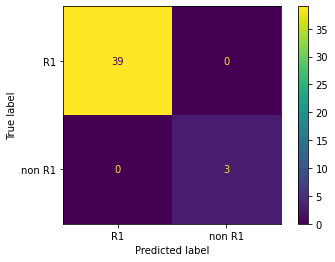

In [23]:
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['R1','non R1'])
disp.plot(values_format='d') 

In [25]:
accuracy_score(y_true = y_test, y_pred = y_predicoes,) 

1.0

(b) Crie um modelo de Aprendizado de Máquina para prever a energia consumida da bateria (**total_energy**) do drone durante o voo. Você deve obter um R² de pelo menos 0.8. <font color='red'>(2.5 pontos)</font>

In [40]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [41]:
dadosF = dados.drop(columns = ['local_time', 'date','route'])
x = dadosF.drop(columns = 'total_energy')
y = dadosF['total_energy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
y_predicoes = lr.predict(x_test) 

In [37]:
R2 = r2_score(y_true = y_test,
              y_pred = y_predicoes)
print('R2: ', R2)

R2:  0.8719362004186705


--------------------------------------------
## 2) Counter Strike <font color='red'>(5 pontos)</font>

No arquivo cs_data.csv há dados de jogadores de CS.

(a) Crie um modelo de Aprendizado de Máquina capaz de prever o **Score** do jogador com o menor número de colunas possível, mantendo um R² de teste maior do que 0.9. Quais foram as colunas selecionadas? Faz sentido?  <font color='red'>(1.5 pontos)</font>

In [54]:
# Carregando os dados
data_cs = pd.read_csv('cs_data.csv', sep=',')

In [55]:
# Separando os dados
x = data_cs.drop(columns=['Player Name', 'Ping', 'Assists', 'MVP', 'Score'])
y = data_cs['Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
y_predicoes = lr.predict(x_test)

In [59]:
from sklearn.metrics import r2_score

In [60]:
R2 = r2_score(y_true = y_test,      
              y_pred = y_predicoes) 
print('R2: ', R2)  

R2:  0.9273966003689008


(b) Diversos jogadores de CS dizem que morrem no jogo **apenas** por causa do **ping** (atraso devido a problemas de rede).

Usando um modelo de Aprendizado de Máquina, diga se isso é verdade ou não. <font color='red'>(1.5 pontos)</font>

In [61]:
df_cs = data_cs

Agrupamos os jogadores através da classe de ping deles, conforme a função abaixo.

In [62]:
def mapear_ping(x):
    if x in range(0,30): return('otimo')
    elif x in range(30,200): return('aceitavel')
    else: return('ruim')

In [63]:
df_cs['ping_class'] = df_cs['Ping'].apply(mapear_ping)

In [64]:
df_cs.groupby('ping_class').mean()

,Ping,Kills,Assists,Deaths,MVP,HSP,Score
ping_class,,,,,,,
aceitavel,59.636084,18.262637,3.795452,18.292436,2.381530,33.776149,45.721921
otimo,14.659550,16.833252,3.595180,17.291768,2.251334,34.354359,42.171114
ruim,317.699387,15.294479,3.441718,19.294479,1.889571,36.269939,39.521472


In [65]:
x = df_cs.drop(columns=['Ping', 'Player Name', 'ping_class'])
y = df_cs['ping_class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
lda = LinearDiscriminantAnalysis()

In [68]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [69]:
y_predicoes = lda.predict(x_test) 

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

<Figure size 1080x360 with 0 Axes>

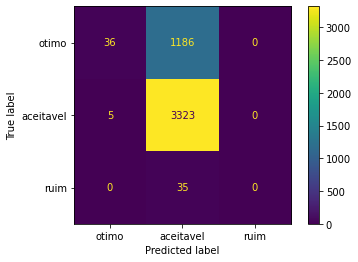

In [71]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['otimo', 'aceitavel', 'ruim'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['otimo', 'aceitavel', 'ruim'])
disp.plot(values_format='d') 

In [72]:
# Começo da segunda análise
df_cs = data_cs

In [73]:
def mapear_ping(x):
    if x in range(0,30): return('otimo')
    elif x in range(30,200): return('aceitavel')
    else: return('ruim')

In [74]:
# Lembre-se de arrumar o nome do dataframe para ser igual ao nome do seu dataframe
df_cs['ping_class'] = df_cs['Ping'].apply(mapear_ping) 

In [75]:
for i in range(len(df_cs)):
  if df_cs['ping_class'][i] == 'otimo':
    df_cs['ping_class'][i] = 0
  elif df_cs['ping_class'][i] == 'aceitavel':
    df_cs['ping_class'][i] = 1
  elif df_cs['ping_class'][i] == 'ruim':
    df_cs['ping_class'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [76]:
df_cs.groupby('ping_class').mean()

,Ping,Kills,Assists,Deaths,MVP,HSP,Score
ping_class,,,,,,,
0,14.659550,16.833252,3.595180,17.291768,2.251334,34.354359,42.171114
1,59.636084,18.262637,3.795452,18.292436,2.381530,33.776149,45.721921
2,317.699387,15.294479,3.441718,19.294479,1.889571,36.269939,39.521472


In [77]:
x = df_cs.drop(columns=['Ping', 'Player Name', 'Score'])
y = df_cs['Score']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(x_train, y_train)

LinearRegression()

In [81]:
y_predicoes = lr.predict(x_test) 

In [82]:
y_predicoes = lr.predict(x_test) 
R2 = r2_score(y_true = y_test,      
              y_pred = y_predicoes) 
print('R2: ', R2) 

R2:  0.946102649634941


CONCLUSÃO: De acordo com nosso primeiro teste, não obtivemos resultados referentes a influência no ping no nível dos jogadores, porém no segundo, provamos que o ping prejudica o desempenho dos jogadores.

(c) Baseado nesse agrupamento, crie um Modelo de Aprendizado de Máquina para predizer o grupo de ping do jogador usando seus atributos descritivos. Lembre-se de não usar o coluna de Ping para isso. <font color='red'>(2 pontos)</font>

Avalie as métricas de desempenho. Antes de tentar melhorar o modelo, compare-o ao resultado do item (b).

Os modelos se corroboram? O que você conclui da hipótese de que o ping ruim causa mais mortes no jogo? E sobre a influência do ping no jogo como um todo, o que você pode concluir? **Faça boxplots e calcule estatísticas** que possam melhorar suas interpretação sobre o problema. 

In [83]:
df_cs = data_cs

In [84]:
def mapear_ping(x):
    if x in range(0,30): return('otimo')
    elif x in range(30,200): return('aceitavel')
    else: return('ruim')

In [85]:
# Lembre-se de arrumar o nome do dataframe para ser igual ao nome do seu dataframe
df_cs['ping_class'] = df_cs['Ping'].apply(mapear_ping) 

In [86]:
df_cs.groupby('ping_class').mean()

,Ping,Kills,Assists,Deaths,MVP,HSP,Score
ping_class,,,,,,,
aceitavel,59.636084,18.262637,3.795452,18.292436,2.381530,33.776149,45.721921
otimo,14.659550,16.833252,3.595180,17.291768,2.251334,34.354359,42.171114
ruim,317.699387,15.294479,3.441718,19.294479,1.889571,36.269939,39.521472


In [87]:
x = df_cs.drop(columns=['Ping', 'Player Name', 'ping_class'])
y = df_cs['ping_class']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [90]:
lda = LinearDiscriminantAnalysis()

In [91]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [92]:
y_predicoes = lda.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

In [94]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['otimo', 'aceitavel', 'ruim'])

<Figure size 1080x360 with 0 Axes>

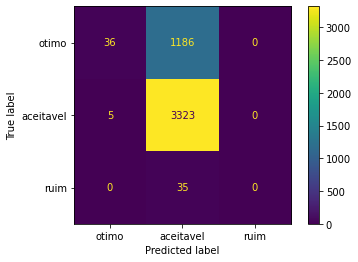

In [95]:
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['otimo', 'aceitavel', 'ruim'])
disp.plot(values_format='d')